# To-Do

*   Conduct some data exploration + data visualisation using this: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies
*   If you can add S&P 500 Data as a column that would be amazing.
*   Brendan probably wants to be conducting an analysis similar to what is seen here: https://www.kaggle.com/sandipdatta/time-series-basic-analysis. As a result, when he has an idea of how he wants the training dataset to be formatted, he can put in a request in a manner similar to how I did for how he wants the datasets to look like. I think this could involve a merge of the two distinct datasets that I mentioned that I wanted - it would look similar to the first dataset that I mentioned (90 columns with previous closing prices) but rather than just having the closing price for the previous 90 days though, you could want the entire details of the cryptocurrency on those 90 days (this can be represented as a tuple, which is a valid input to an LSTM model).



# Imports + Notebook Setup

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import requests
import io

# Data Preprocessing

### Dataset 1

Setup

In [ ]:
url = 'https://raw.githubusercontent.com/kjaisingh/519-Project/main/Datasets/Bitcoin-Raw.csv'
download = requests.get(url).content
btc  = pd.read_csv(io.StringIO(download.decode('utf-8')))

Validate Import

In [ ]:
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
btc.size

28620

Add Column for Next Day's Closing Price

In [ ]:
column = list(btc['Close'])
btc.drop(btc.tail(1).index,inplace=True)

def addCloseColumn(new, num, days):
  temp = 'Close' + str(num+1)
  new[temp] = column[num : len(column)- days + num]

addCloseColumn(btc, 1, 1)

btc.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Close2
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,139.000000
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,116.989998
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,105.209999
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,97.750000
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,112.500000


Calculating and Adding Relative Metric Columns (Day difference, relative close, high/low ratio, relative high, relative low)

In [ ]:
def addRelativeColumns(old): 
  day = btc['Close'] - btc['Open'] 
  btc['Day_Diff'] = day
  btc['Rel_Close'] = day / btc['Open'] 
  btc['HL_Ratio'] = btc['High'] / btc['Low'] 
  btc['Rel_High'] = btc['High'] / btc['Close'] 
  btc['Rel_Low'] = btc['Low'] / btc['Close']

addRelativeColumns(btc)

btc.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Close2,Day_Diff,Rel_Close,HL_Ratio,Rel_High,Rel_Low
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,139.000000,10.095993,0.075094,1.100657,1.020396,0.927079
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,116.989998,-5.000000,-0.034722,1.096083,1.057050,0.964389
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,105.209999,-22.010002,-0.158345,1.298645,1.195743,0.920762
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,97.750000,-11.169998,-0.095979,1.361047,1.193803,0.877121
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,112.500000,-8.500000,-0.080000,1.366979,1.106169,0.809207


Calculating Simple Moving Averages (7 day SMA, 30 day SMA, 60 day SMA, 90 day SMA, and 200 day SMA)



In [ ]:
btc['SMA7'] = btc['Close'].rolling(window=7, center=False).mean()
btc['SMA30'] = btc['Close'].rolling(window=30,center=False).mean()
btc['SMA60'] = btc['Close'].rolling(window=60,center=False).mean()
btc['SMA90'] = btc['Close'].rolling(window=90,center=False).mean()
btc['SMA200'] = btc['Close'].rolling(window=200,center=False).mean()
  

btc.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Close2,Day_Diff,Rel_Close,HL_Ratio,Rel_High,Rel_Low,SMA7,SMA30,SMA60,SMA90,SMA200
2856,2857,Bitcoin,BTC,2021-02-22 23:59:59,57533.389325,48967.565188,57532.738864,54207.319065,9.205242e+10,1.010205e+12,48824.426869,-3325.419799,-0.057800,1.174929,1.061358,0.903339,53823.370358,42537.510081,38009.599295,32010.011573,21262.492436
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11,49705.333316,-5380.502887,-0.099262,1.196825,1.110201,0.927622,53769.735433,43088.678373,38412.259905,32344.370530,21448.607207
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11,47093.853019,870.245655,0.017820,1.086345,1.031884,0.949868,53420.639116,43666.643049,38800.064836,32706.089527,21638.363644
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11,46339.760083,-2615.229406,-0.052611,1.103094,1.103094,1.000000,52765.504305,44150.776498,39147.090810,33039.261208,21815.454213
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,46188.451275,-840.703971,-0.017819,1.088088,1.043829,0.959324,51401.450933,44681.016931,39468.006680,33357.287264,21987.762456


Calculating Cumulative Moving Average and Exponential Moving Averages ($\alpha$ = 0.1, $\alpha$ = 0.2, $\alpha$ = 0.3, ..., $\alpha$ = 1)

In [ ]:
btc['CMA'] = btc['Close'].expanding().mean()
btc['EMA1'] = btc['Close'].ewm(alpha=0.1, adjust=False).mean()
btc['EMA2'] = btc['Close'].ewm(alpha=0.2, adjust=False).mean()
btc['EMA3'] = btc['Close'].ewm(alpha=0.3, adjust=False).mean()
btc['EMA4'] = btc['Close'].ewm(alpha=0.4, adjust=False).mean()
btc['EMA5'] = btc['Close'].ewm(alpha=0.5, adjust=False).mean()
btc['EMA6'] = btc['Close'].ewm(alpha=0.6, adjust=False).mean()
btc['EMA7'] = btc['Close'].ewm(alpha=0.7, adjust=False).mean()
btc['EMA8'] = btc['Close'].ewm(alpha=0.8, adjust=False).mean()
btc['EMA9'] = btc['Close'].ewm(alpha=0.9, adjust=False).mean()
btc['EMA10'] = btc['Close'].ewm(alpha=1, adjust=False).mean()

btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Close2,Day_Diff,Rel_Close,HL_Ratio,Rel_High,Rel_Low,SMA7,SMA30,SMA60,SMA90,SMA200,CMA,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,EMA7,EMA8,EMA9,EMA10
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,139.000000,10.095993,0.075094,1.100657,1.020396,0.927079,NaN,NaN,NaN,NaN,NaN,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993,144.539993
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,116.989998,-5.000000,-0.034722,1.096083,1.057050,0.964389,NaN,NaN,NaN,NaN,NaN,141.769997,143.985994,143.431995,142.877995,142.323996,141.769997,141.215997,140.661998,140.107999,139.553999,139.000000
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,105.209999,-22.010002,-0.158345,1.298645,1.195743,0.920762,NaN,NaN,NaN,NaN,NaN,133.509997,141.286394,138.143595,135.111596,132.190397,129.379997,126.680398,124.091598,121.613598,119.246398,116.989998
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,97.750000,-11.169998,-0.095979,1.361047,1.193803,0.877121,NaN,NaN,NaN,NaN,NaN,126.434998,137.678755,131.556876,126.141117,121.398238,117.294998,113.798159,110.874479,108.490719,106.613639,105.209999
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,112.500000,-8.500000,-0.080000,1.366979,1.106169,0.809207,NaN,NaN,NaN,NaN,NaN,120.697998,133.685879,124.795501,117.623782,111.938943,107.522499,104.169263,101.687344,99.898144,98.636364,97.750000


Removing Datapoints with no Moving Average

In [ ]:
btc = btc.dropna(subset=['SMA7', 'SMA30', 'SMA60', 'SMA90', 'SMA200'])
close2 = btc.pop('Close2')
btc['Close2'] = close2
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Day_Diff,Rel_Close,HL_Ratio,Rel_High,Rel_Low,SMA7,SMA30,SMA60,SMA90,SMA200,CMA,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,EMA7,EMA8,EMA9,EMA10,Close2
199,200,Bitcoin,BTC,2013-11-14 23:59:59,425.899994,395.190002,406.410004,420.200012,0.0,5.038818e+09,13.790009,0.033931,1.077709,1.013565,0.940481,362.025709,238.061666,184.322333,164.856867,132.887528,132.887528,294.314803,347.211757,373.225716,388.494797,398.657691,406.017945,411.524047,415.587278,418.427258,420.200012,417.950012
200,201,Bitcoin,BTC,2013-11-15 23:59:59,437.890015,396.109985,419.410004,417.950012,0.0,5.013561e+09,-1.459991,-0.003481,1.105476,1.047709,0.947745,373.431427,247.241667,189.092833,168.239645,134.254578,134.305749,306.678324,361.359408,386.643005,400.276883,408.303852,413.177185,416.022223,417.477465,417.997737,417.950012,440.220001
201,202,Bitcoin,BTC,2013-11-16 23:59:59,450.260010,415.570007,417.279999,440.220001,0.0,5.282849e+09,22.940002,0.054975,1.083476,1.022807,0.944005,387.875715,257.040667,194.235500,171.869867,135.760678,135.820176,320.032492,377.131527,402.716104,416.254131,424.261927,429.402875,432.960668,435.671494,437.997775,440.220001,492.109985
202,203,Bitcoin,BTC,2013-11-17 23:59:59,500.579987,440.239990,440.959991,492.109985,0.0,5.907842e+09,51.149994,0.115997,1.137062,1.017212,0.894597,411.517142,268.245666,200.246166,176.015533,137.636278,137.575298,337.240241,400.127218,429.534268,446.596472,458.185956,467.027141,474.365190,480.822287,486.698764,492.109985,703.559998
203,204,Bitcoin,BTC,2013-11-18 23:59:59,703.780029,494.940002,496.579987,703.559998,0.0,8.449070e+09,206.980011,0.416811,1.421950,1.000313,0.703479,463.105713,285.950333,209.811333,182.486145,140.628028,140.349733,373.872217,460.813774,511.741987,549.381882,580.872977,608.946855,634.801555,659.012455,681.873874,703.559998,584.609985


Download Dataset 1

In [ ]:
from google.colab import files
btc.to_csv('Bitcoin-Metadata.csv', index = False) 
files.download('Bitcoin-Metadata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Dataset 2

Setup

In [ ]:
btc2 = pd.read_csv(io.StringIO(download.decode('utf-8')))

Validate Import

In [ ]:
btc2.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
btc2.size

28620

 Create Time Series Dataframe Iteratively

In [ ]:
btc_91 = btc2[['SNo', 'Date']].copy()
btc_91 = btc_91.iloc[90:]
btc2.drop(btc2.tail(1).index,inplace=True)

for i in range(90):
  addCloseColumn(btc_91, i, 90)

column91 = btc2['Close']
column91.iloc[90:]
btc_91['Close91'] = column91

btc_91.head()

,SNo,Date,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,...,Close52,Close53,Close54,Close55,Close56,Close57,Close58,Close59,Close60,Close61,Close62,Close63,Close64,Close65,Close66,Close67,Close68,Close69,Close70,Close71,Close72,Close73,Close74,Close75,Close76,Close77,Close78,Close79,Close80,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91
90,91,2013-07-28 23:59:59,144.539993,139.000000,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,115.242996,115.000000,117.980003,111.500000,114.220001,118.760002,123.014999,123.498001,121.989998,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000,129.300003,122.292000,122.222000,121.419998,121.650002,...,108.250000,110.150002,109.500000,108.300003,107.599998,102.737000,103.949997,104.000000,101.436996,94.649200,94.994003,96.613998,88.050003,90.134003,77.529999,80.525803,68.431000,70.277298,74.561096,76.515999,76.694000,86.760002,88.980003,93.594902,98.133904,94.691299,98.400200,97.450798,98.500000,90.580002,92.169998,89.390099,90.757301,91.610001,95.558502,94.510002,96.900002,96.020203,94.115997,99.755997
91,92,2013-07-29 23:59:59,139.000000,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,115.242996,115.000000,117.980003,111.500000,114.220001,118.760002,123.014999,123.498001,121.989998,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000,129.300003,122.292000,122.222000,121.419998,121.650002,118.000000,...,110.150002,109.500000,108.300003,107.599998,102.737000,103.949997,104.000000,101.436996,94.649200,94.994003,96.613998,88.050003,90.134003,77.529999,80.525803,68.431000,70.277298,74.561096,76.515999,76.694000,86.760002,88.980003,93.594902,98.133904,94.691299,98.400200,97.450798,98.500000,90.580002,92.169998,89.390099,90.757301,91.610001,95.558502,94.510002,96.900002,96.020203,94.115997,99.755997,101.199997
92,93,2013-07-30 23:59:59,116.989998,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,115.242996,115.000000,117.980003,111.500000,114.220001,118.760002,123.014999,123.498001,121.989998,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000,129.300003,122.292000,122.222000,121.419998,121.650002,118.000000,111.500000,...,109.500000,108.300003,107.599998,102.737000,103.949997,104.000000,101.436996,94.649200,94.994003,96.613998,88.050003,90.134003,77.529999,80.525803,68.431000,70.277298,74.561096,76.515999,76.694000,86.760002,88.980003,93.594902,98.133904,94.691299,98.400200,97.450798,98.500000,90.580002,92.169998,89.390099,90.757301,91.610001,95.558502,94.510002,96.900002,96.020203,94.115997,99.755997,101.199997,107.989998
93,94,2013-07-31 23:59:59,105.209999,97.750000,112.500000,115.910004,112.300003,111.500000,113.566002,112.669998,117.199997,115.242996,115.000000,117.980003,111.500000,114.220001,118.760002,123.014999,123.498001,121.989998,122.000000,122.879997,123.889000,126.699997,133.199997,131.979996,133.479996,129.744995,129.000000,132.300003,128.798996,129.000000,129.300003,122.292000,122.222000,121.419998,121.650002,118.000000,111.500000,108.300003,...,108.300003,107.599998,102.737000,103.949997,104.000000,101.436996,94.649200,94.994003,96.613998,88.050003,90.134003,77.529999,80.525803,68.431000,70.277298,74.561096,76.515999,76.694000,86.760002,88.980003,93.594902,98.133904,94.691299,98.400200,97.450798,98.500000,90.580002,92.169998,89.390099,90.757301,91.610001,95.558502,94.510002,96.900002,96.020203,

Download Dataset 2

In [ ]:
from google.colab import files
btc_91.to_csv('Bitcoin-Historical.csv', index = False) 
files.download('Bitcoin-Historical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

### Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns

### Closing Value of BTC Over Time

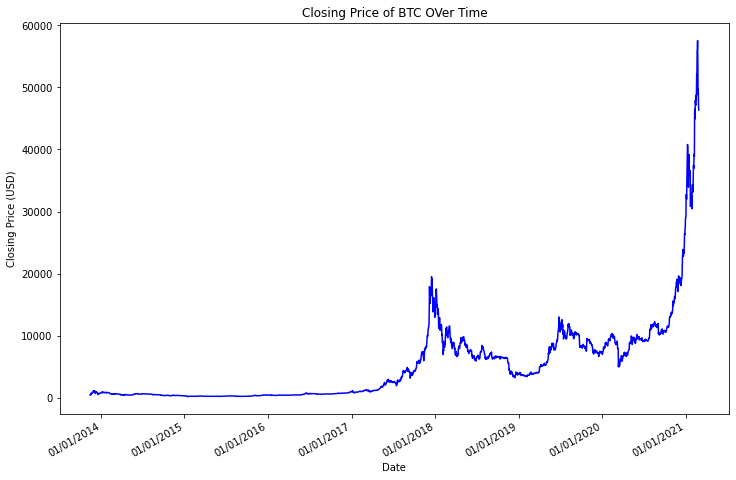

In [ ]:
btc['DateCut'] = btc['Date'].str[:10]
btc['DateCut'] = btc['DateCut'].str.replace('-', '/')
btc['DateCut'] = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in btc['DateCut']]

fig, ax = plt.subplots(figsize=(12,8))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(btc['DateCut'], btc['Close'], color = 'blue')
plt.gcf().autofmt_xdate()

plt.title('Closing Price of BTC OVer Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

### Simple Moving Averages and Cumulative Average Over Time

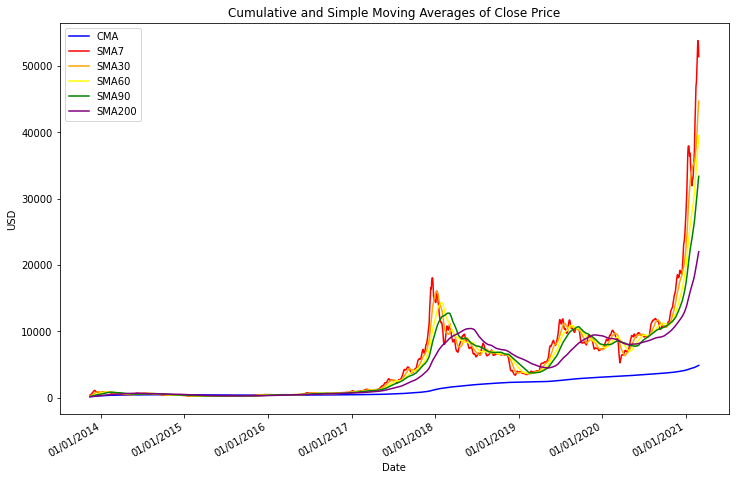

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(btc['DateCut'], btc['CMA'], color = 'blue', label = 'CMA')
plt.plot(btc['DateCut'], btc['SMA7'], color = 'red', label = 'SMA7')
plt.plot(btc['DateCut'], btc['SMA30'], color = 'orange', label = 'SMA30')
plt.plot(btc['DateCut'], btc['SMA60'], color = 'yellow', label = 'SMA60')
plt.plot(btc['DateCut'], btc['SMA90'], color = 'green', label = 'SMA90')
plt.plot(btc['DateCut'], btc['SMA200'], color = 'purple', label = 'SMA200')
plt.gcf().autofmt_xdate()

plt.title('Cumulative and Simple Moving Averages of Close Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.show()

### Exponential Moving Averages and Cumulative Average Over Time

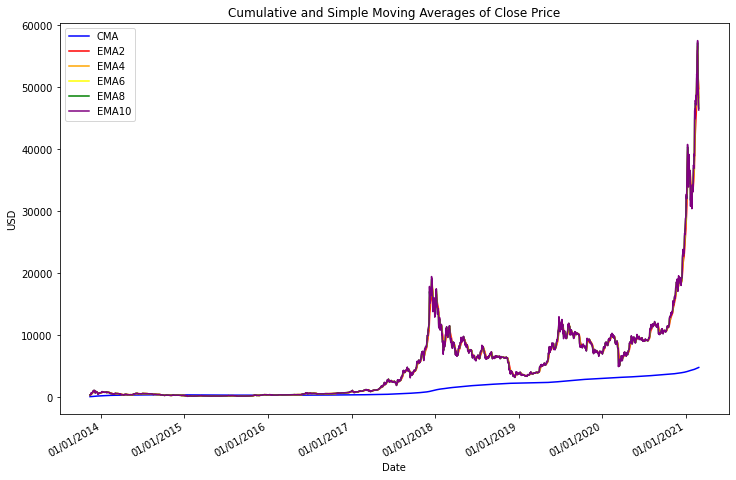

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.plot(btc['DateCut'], btc['CMA'], color = 'blue', label = 'CMA')
plt.plot(btc['DateCut'], btc['EMA2'], color = 'red', label = 'EMA2')
plt.plot(btc['DateCut'], btc['EMA4'], color = 'orange', label = 'EMA4')
plt.plot(btc['DateCut'], btc['EMA6'], color = 'yellow', label = 'EMA6')
plt.plot(btc['DateCut'], btc['EMA8'], color = 'green', label = 'EMA8')
plt.plot(btc['DateCut'], btc['EMA10'], color = 'purple', label = 'EMA10')
plt.gcf().autofmt_xdate()

plt.title('Cumulative and Simple Moving Averages of Close Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='upper left')
plt.show()

### Correlation Matrix of Input Features

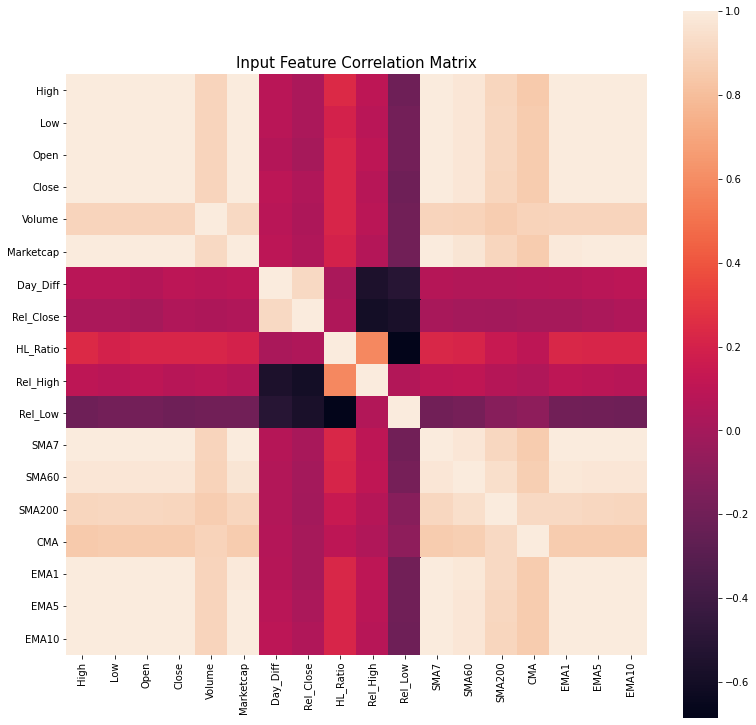

In [ ]:
btc_corr = btc.drop(['SNo', 'Name', 'Symbol', 'Date', 'SMA30', 'SMA90',
                     'EMA2', 'EMA3', 'EMA4', 'EMA6', 'EMA7', 'EMA8', 'EMA9', 'Close2'], axis = 1)
corrmat = btc_corr.corr(method='spearman')
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Input Feature Correlation Matrix", fontsize=15)
plt.show()